Number of intersections: 5


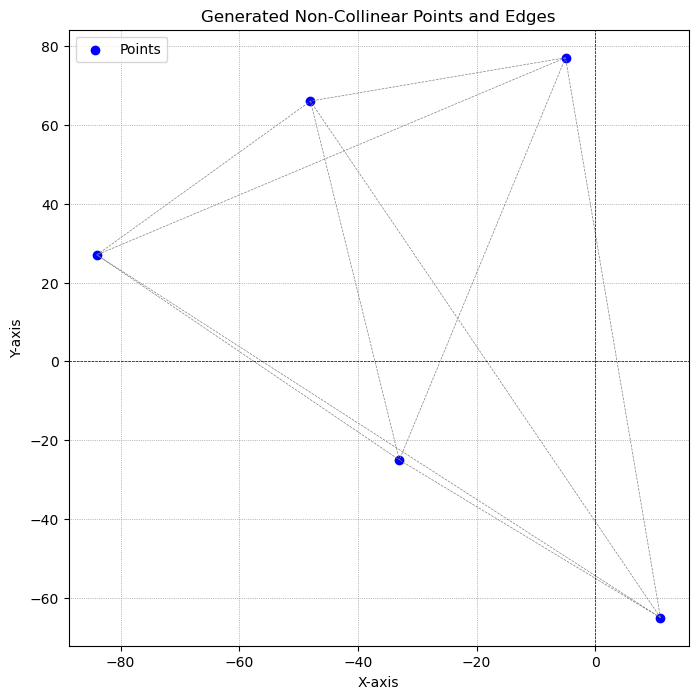

In [13]:
import random
import matplotlib.pyplot as plt

def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False
  
def orientation(p, q, r): 
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if (val > 0): 
        return 1
    elif (val < 0): 
        return 2
    else: 
        return 0
  
def doIntersect(p1, q1, p2, q2): 
    # Find orientations
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    return False

def generate_non_collinear_points(n, min_val=-100, max_val=100):
    points = []
    while len(points) < n:
        x, y = random.randint(min_val, max_val), random.randint(min_val, max_val)
        # Temporarily add the new point
        temp_points = points + [(x, y)]
        if len(temp_points) < 3 or not are_more_than_three_collinear(temp_points):  
            points.append((x, y))
    return points

def are_more_than_three_collinear(points):
    n = len(points)
    for i in range(n):
        slopes = {}
        for j in range(n):
            if i != j:
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                if dx == 0:
                    s = float('inf')  # Represent vertical slope
                else:
                    s = dy / dx
                slopes[s] = slopes.get(s, 0) + 1
        if any(count >= 2 for count in slopes.values()):
            return True
    return False

def find_all_edges(points):
    edges = []
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((points[i], points[j]))
    return edges

def plot_points_and_edges(points, edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    
    for edge in edges:
        x_vals = [edge[0][0], edge[1][0]]
        y_vals = [edge[0][1], edge[1][1]]
        plt.plot(x_vals, y_vals, color='gray', linestyle='--', linewidth=0.5)
    
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.title('Generated Non-Collinear Points and Edges')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

# Generate points
points = generate_non_collinear_points(5)
edges = find_all_edges(points)

# Count crossings (excluding shared vertices)
c = 0
for i in range(len(edges)):
    for j in range(i + 1, len(edges)): 
        p1, q1 = edges[i]
        p2, q2 = edges[j]
        # Skip if the edges share a vertex
        if len(set([p1, q1, p2, q2])) < 4:
            continue
        if doIntersect(p1, q1, p2, q2):
            c += 1

print(f"Number of intersections: {c}")

# Plot the points and edges
plot_points_and_edges(points, edges)
